In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import modules

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

%cd '/content/drive/MyDrive/Colab Notebooks/media-agenda/'
from util import OptimalKClustersConfig

%cd '/content/drive/MyDrive/Colab Notebooks/media-agenda/data'

0.11.0
/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda
/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda/data


## Load cluster labels and sentence embeddings

In [4]:
labels = np.load('/content/drive/MyDrive/Colab Notebooks/media-agenda/refactorization/data/15_kmean_labels.npy')
en_embeddings = np.load('/content/drive/MyDrive/Colab Notebooks/media-agenda/refactorization/data/en_embeddings.npy')
de_embeddings = np.load('/content/drive/MyDrive/Colab Notebooks/media-agenda/refactorization/data/de_embeddings.npy')
all_embeddings = np.concatenate((en_embeddings, de_embeddings), axis=0)

In [5]:
assert labels.shape[0] == all_embeddings.shape[0]
all_embeddings.shape

(328091, 512)

## Calculate the cluster centroids for k = 15

In [ ]:
k = np.unique(labels)
# index_dictionary = []
# embedding_dictionary = []
centroids = []

for i in k:
  indeces_for_cluster_i = np.argwhere(labels == i).squeeze()
  embeddings_for_cluster_i = all_embeddings[indeces_for_cluster_i].squeeze()

  print('Cluster', i, ' Number of sentences:', len(indeces_for_cluster_i))

  centroid = np.mean(embeddings_for_cluster_i, axis = 0)
  centroids.append(centroid)

  # index_dictionary.append(indeces_for_cluster_i)
  # embedding_dictionary.append(embeddings_for_cluster_i)

centroids = np.array(centroids).squeeze()
# index_dictionary = np.array(index_dictionary).squeeze()
# embedding_dictionary = np.array(embedding_dictionary).squeeze()

print(centroids.shape)
# print(index_dictionary.shape)
# print(embedding_dictionary.shape)

%cd '/content/drive/MyDrive/Colab Notebooks/media-agenda/data/'
# np.save('centroids_for_15_clusters.npy', centroids)
# np.save('index_dict.npy', index_dictionary)
# np.save('embedding_dict.npy', embedding_dictionary)

Cluster 0  Number of sentences: 18604
Cluster 1  Number of sentences: 15494
Cluster 2  Number of sentences: 27780
Cluster 3  Number of sentences: 28070
Cluster 4  Number of sentences: 18246
Cluster 5  Number of sentences: 21337
Cluster 6  Number of sentences: 23524
Cluster 7  Number of sentences: 15957
Cluster 8  Number of sentences: 21358
Cluster 9  Number of sentences: 27638
Cluster 10  Number of sentences: 22876
Cluster 11  Number of sentences: 19653
Cluster 12  Number of sentences: 24860
Cluster 13  Number of sentences: 20370
Cluster 14  Number of sentences: 22324
(15, 512)
/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda/data


## Calculate consine similarities

In [ ]:
centroids = np.load('/content/drive/MyDrive/Colab Notebooks/media-agenda/data/centroids_for_15_clusters.npy')

cosine_similarities = []
for embedding, cluster_label in zip(all_embeddings, labels):
  similarity_score = np.dot(embedding, centroids[cluster_label])
  cosine_similarities.append(similarity_score)

# pd.DataFrame(cosine_similarities).to_csv('cosine_similarities_for_15_clusters.csv')

In [ ]:
centroids = np.load('/content/drive/MyDrive/Colab Notebooks/media-agenda/data/centroids_for_15_clusters.npy')
cosine_similarities = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/media-agenda/data/cosine_similarities_for_15_clusters.csv')['0']
print(cosine_similarities.shape)

metadata_file = '/content/drive/MyDrive/Colab Notebooks/media-agenda/data/sentence_cluster_sentiment_dict.json'
# load sentences assignement as dataframe
df = pd.read_json(metadata_file)
print('Loaded sentence assigments: ', df.shape[0])
display(df.head())


df['cosine_similarity'] = cosine_similarities
display(df.head())

%cd '/content/drive/MyDrive/Colab Notebooks/media-agenda/data/'
df.to_csv('sentence_cluster_sentiment_dict_with_cosine_similarity_for_15_clusters.csv')

(328091,)
Loaded sentence assigments:  328091


,sentence_id,source,article_id,comment_id,posting_time,cluster,sentiw_sentiment,textblob_polarity,textblob_subjectivity
0,0,nytimes,0,-1,2005-11-01,1,0.12500,-0.017045,0.518182
1,1,nytimes,0,-1,2005-11-01,1,-0.12500,0.337500,0.675000
2,2,nytimes,0,-1,2005-11-01,3,0.07500,0.085714,0.192857
3,3,nytimes,0,-1,2005-11-01,1,0.50000,0.025000,0.250000
4,4,nytimes,0,-1,2005-11-01,1,-0.03125,-0.050000,0.291667


,sentence_id,source,article_id,comment_id,posting_time,cluster,sentiw_sentiment,textblob_polarity,textblob_subjectivity,cosine_similarity
0,0,nytimes,0,-1,2005-11-01,1,0.12500,-0.017045,0.518182,0.318689
1,1,nytimes,0,-1,2005-11-01,1,-0.12500,0.337500,0.675000,0.396096
2,2,nytimes,0,-1,2005-11-01,3,0.07500,0.085714,0.192857,0.537876
3,3,nytimes,0,-1,2005-11-01,1,0.50000,0.025000,0.250000,0.433355
4,4,nytimes,0,-1,2005-11-01,1,-0.03125,-0.050000,0.291667,0.384546


/content/drive/.shortcut-targets-by-id/1jko4SIvsKFTxv155O0DV1wHZ_jS75VfX/Colab Notebooks/media-agenda/data


## Plot

In [6]:
cosine_similarities = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/media-agenda/data/cosine_similarities_for_15_clusters.csv')['0']

cluster_label_for_15 = ['Planting and gardening: {pesticid, plant, pflanz, pestizid}', 'Retail', 'Garbage: {http, www, http, de}', 'GMO label and bio-products',
                        'Garbage: {www, articl, sysop, michaelis}', 'Taste and food', 'Chemicals and cancer: {cancer, chemic, bodi, dioxin}', 'Genetic research', 
                        'Health and diet', 'Garbage: {thank, here, all, mich}', 'Governance and public policy', 'Meat and animal feeding', 
                        'Agriculture', 'Price and consumption', 'Garbage: {articl, question, verscharft, tragt}']

topic_df = pd.DataFrame({'cluster': range(0, 15), 
                        'topic': cluster_label_for_15})
df = pd.DataFrame({'cos_similarity': cosine_similarities, 
                   'cluster': labels})

df = df.merge(topic_df, how = 'left', validate = 'many_to_one')

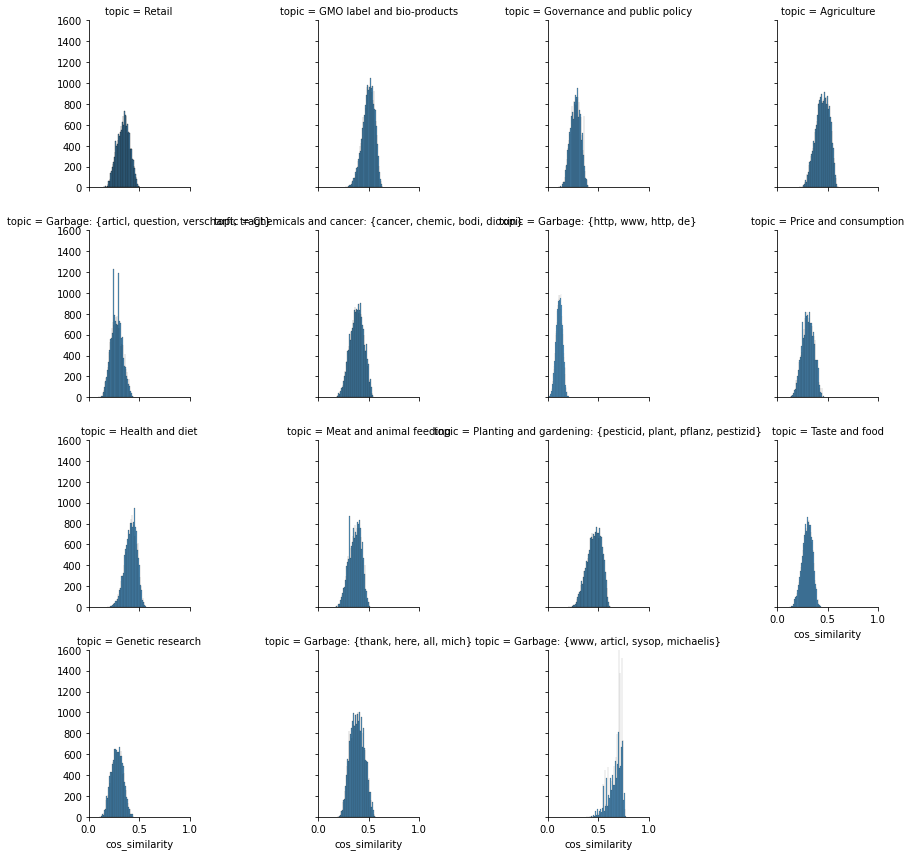

In [8]:
g = sns.FacetGrid(data = df, col = 'topic', col_wrap = 4)
g.map(sns.histplot, 'cos_similarity')
g.set(xlim = (0, 1), ylim = (0, 1600))

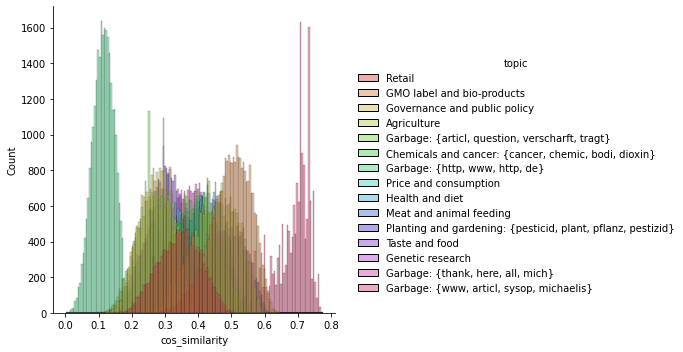

In [ ]:
sns.displot(data = df, x = 'cos_similarity', hue = 'topic')

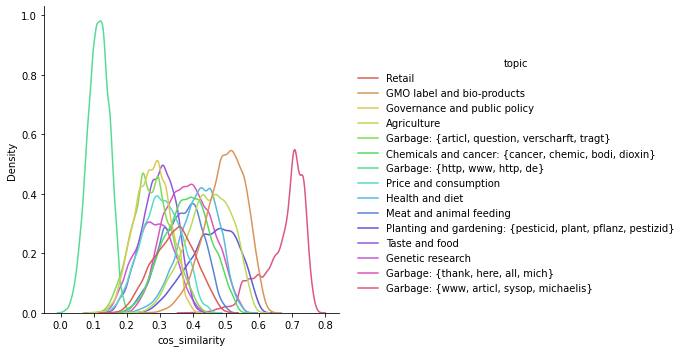

In [ ]:
sns.displot(data = df, x = 'cos_similarity', hue = 'topic', kind = 'kde')

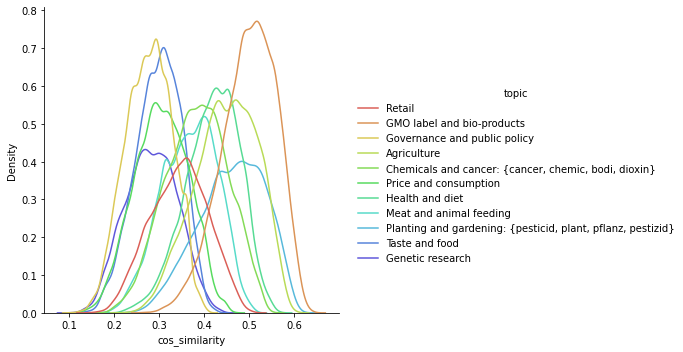

In [ ]:
sns.displot(data = df[df.cluster.isin(OptimalKClustersConfig.valid_cluster_index)], x = 'cos_similarity', hue = 'topic', kind = 'kde')


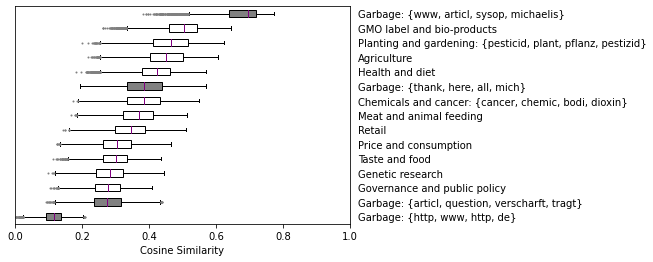

In [150]:
x = []
medians = []
positions = []

for k in range(OptimalKClustersConfig.k_with_garbage):
  values = df[df.cluster == k].cos_similarity.values
  x.append(values)
  medians.append(np.median(values))
sorted_medians = np.sort(medians)

for item in medians:
  positions.append(np.argwhere(sorted_medians == item).flatten()[0])

is_normal_topic = np.char.find(cluster_label_for_15, 'Garbage').astype(bool)
colors = ['white' if (i == True) else 'gray' for i in is_normal_topic]


# plt.boxplot(x, positions = None, vert = False, labels = cluster_label_for_15)
# plt.xlim(0, 1)
# plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
# plt.show()

bplot = plt.boxplot(x, positions = positions, vert = False, labels = cluster_label_for_15,
            patch_artist = True,
            flierprops = dict(marker = 'o', markersize = 1, markeredgecolor = 'gray'),
            medianprops = dict(color = 'purple'))
plt.xlim(0, 1)
plt.xlabel('Cosine Similarity')
plt.tick_params(axis = 'y', which = 'major', length = 0, pad = 8, labelleft = False, labelright = True, direction = 'out')
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
plt.show() 

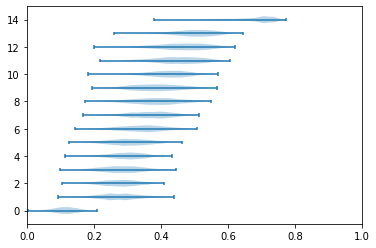

In [127]:
plt.violinplot(x, positions = positions, vert = False)
plt.xlim(0, 1)
plt.show()
